Felix Singerman - 7970742
# Image Labelling with Neural Networks

We will use the Extended Outex texture dataset from the University of Oulu and LAGIS- FRE CNRS which can be downloaded from http://lagis-vi.univ-lille1.fr/datasets/outex.html. Using an archive called Outex TC 00030.tar.gz. This archive contains colour images of 68 different texture classes. There are 10, 880 testing images and 1, 360 training images. There are two text files which provide a label for each images. We will however use the test images for training and train images for testing. We must use Keras with the tensorflow backend for this assignment. 

### Getting Started

We will organize the images suitably for tf.keras.preprocessing.

In [2]:
import math
import numpy as np
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import pandas as pd

colnames = ['ID']

test = pd.read_csv('Outex-TC-00030/000/train.txt', names =colnames)
test[['picture','ID']] = test.pop("ID").str.split(n=1, expand=True)
test = test.iloc[1:]

train = pd.read_csv('Outex-TC-00030/000/test.txt', names =colnames)
train[['picture','ID']] = train.pop("ID").str.split(n=1, expand=True)
train = train.iloc[1:]

classes = pd.read_csv('Outex-TC-00030/000/classes.txt', names = colnames)
classes[['picture','ID','misc']] = classes.pop("ID").str.split(n=2, expand=True)
classes = classes.iloc[1:]

train = pd.merge(train,classes, on = "ID",how='inner')
train = train.drop(['ID', 'misc'], axis=1)

test = pd.merge(test,classes, on = "ID",how='inner')
test = test.drop(['ID', 'misc'], axis=1)


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train,
        directory='Outex-TC-00030/images',
        target_size=(128, 128),
        x_col="picture_x", y_col="picture_y",
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_dataframe(
        dataframe = test,
        directory = 'Outex-TC-00030/images',
        target_size=(128, 128),
        x_col="picture_x", y_col="picture_y",
        batch_size=32,
        class_mode='categorical')

train_generator_small = train_datagen.flow_from_dataframe(
        dataframe=train,
        directory='Outex-TC-00030/images',
        target_size=(36, 36),
        x_col="picture_x", y_col="picture_y",
        batch_size=32,
        class_mode='categorical')

validation_generator_small = test_datagen.flow_from_dataframe(
        dataframe = test,
        directory = 'Outex-TC-00030/images',
        target_size=(36, 36),
        x_col="picture_x", y_col="picture_y",
        batch_size=32,
        class_mode='categorical')


/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 10880 images belonging to 68 classes.
Found 1360 images belonging to 68 classes.
Found 10880 images belonging to 68 classes.
Found 1360 images belonging to 68 classes.


### Perceptron

We now build a multilayer perceptron model to classify the texture into their 68 materials. We reduce the size of the images to 32 × 32.

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
model.add(Dense(64, activation='relu', input_shape=(36, 36, 3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(68, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



STEP_SIZE_TRAIN=train_generator_small.n//train_generator_small.batch_size
STEP_SIZE_VALID=validation_generator_small.n//validation_generator_small.batch_size
history = model.fit_generator(generator=train_generator_small,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator_small,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)



Epoch 1/10
181/340 [==============>...............] - ETA: 1:21 - loss: 4.0673 - acc: 0.0280

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125291). Check your callbacks.
  % delta_t_median)


182/340 [===============>..............] - ETA: 1:21 - loss: 4.0664 - acc: 0.0278

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152364). Check your callbacks.
  % delta_t_median)


183/340 [===============>..............] - ETA: 1:21 - loss: 4.0643 - acc: 0.0277

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162588). Check your callbacks.
  % delta_t_median)


186/340 [===============>..............] - ETA: 1:20 - loss: 4.0614 - acc: 0.0276

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180715). Check your callbacks.
  % delta_t_median)


190/340 [===============>..............] - ETA: 1:21 - loss: 4.0571 - acc: 0.0280

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225559). Check your callbacks.
  % delta_t_median)


191/340 [===============>..............] - ETA: 1:20 - loss: 4.0557 - acc: 0.0283

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167909). Check your callbacks.
  % delta_t_median)
/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112355). Check your callbacks.
  % delta_t_median)


223/340 [==================>...........] - ETA: 1:08 - loss: 4.0145 - acc: 0.0275

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103405). Check your callbacks.
  % delta_t_median)


258/340 [=====================>........] - ETA: 48s - loss: 3.9543 - acc: 0.0310

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142946). Check your callbacks.
  % delta_t_median)


259/340 [=====================>........] - ETA: 47s - loss: 3.9527 - acc: 0.0310

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.174573). Check your callbacks.
  % delta_t_median)


261/340 [======================>.......] - ETA: 46s - loss: 3.9495 - acc: 0.0312

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104358). Check your callbacks.
  % delta_t_median)


267/340 [======================>.......] - ETA: 42s - loss: 3.9418 - acc: 0.0321

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101479). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 204s 600ms/step - loss: 3.8256 - acc: 0.0412 - val_loss: 3.0550 - val_acc: 0.1079
Epoch 2/10
 13/340 [>.............................] - ETA: 1:21 - loss: 3.2518 - acc: 0.1106

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114189). Check your callbacks.
  % delta_t_median)


 15/340 [>.............................] - ETA: 1:23 - loss: 3.2687 - acc: 0.1083

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.153093). Check your callbacks.
  % delta_t_median)


 17/340 [>.............................] - ETA: 1:20 - loss: 3.2706 - acc: 0.1029

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138242). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 135s 398ms/step - loss: 3.0507 - acc: 0.1131 - val_loss: 2.5948 - val_acc: 0.1634
Epoch 3/10
 22/340 [>.............................] - ETA: 1:52 - loss: 2.9111 - acc: 0.1250

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101869). Check your callbacks.
  % delta_t_median)


 25/340 [=>............................] - ETA: 1:54 - loss: 2.9099 - acc: 0.1250

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110526). Check your callbacks.
  % delta_t_median)


 29/340 [=>............................] - ETA: 1:56 - loss: 2.8893 - acc: 0.1272

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117168). Check your callbacks.
  % delta_t_median)


 30/340 [=>............................] - ETA: 1:58 - loss: 2.8867 - acc: 0.1281

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104520). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 165s 484ms/step - loss: 2.8178 - acc: 0.1427 - val_loss: 2.3288 - val_acc: 0.2440
Epoch 4/10
340/340 [==============================] - 176s 518ms/step - loss: 2.6833 - acc: 0.1687 - val_loss: 2.1301 - val_acc: 0.3637
Epoch 5/10
340/340 [==============================] - 160s 471ms/step - loss: 2.6124 - acc: 0.1832 - val_loss: 2.0469 - val_acc: 0.3185
Epoch 6/10
340/340 [==============================] - 158s 466ms/step - loss: 2.5731 - acc: 0.1924 - val_loss: 1.9821 - val_acc: 0.3660
Epoch 7/10
199/340 [================>.............] - ETA: 54s - loss: 2.5321 - acc: 0.2070

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114923). Check your callbacks.
  % delta_t_median)


200/340 [================>.............] - ETA: 54s - loss: 2.5327 - acc: 0.2067

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127441). Check your callbacks.
  % delta_t_median)


201/340 [================>.............] - ETA: 53s - loss: 2.5328 - acc: 0.2072

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129745). Check your callbacks.
  % delta_t_median)


208/340 [=================>............] - ETA: 53s - loss: 2.5300 - acc: 0.2090

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.116252). Check your callbacks.
  % delta_t_median)


212/340 [=================>............] - ETA: 52s - loss: 2.5287 - acc: 0.2089

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100076). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 149s 437ms/step - loss: 2.5210 - acc: 0.2049 - val_loss: 2.0086 - val_acc: 0.3426
Epoch 8/10
340/340 [==============================] - 156s 460ms/step - loss: 2.4716 - acc: 0.2131 - val_loss: 1.8671 - val_acc: 0.3675
Epoch 9/10
 27/340 [=>............................] - ETA: 2:05 - loss: 2.4197 - acc: 0.2384

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158944). Check your callbacks.
  % delta_t_median)


 30/340 [=>............................] - ETA: 2:13 - loss: 2.4168 - acc: 0.2406

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137683). Check your callbacks.
  % delta_t_median)


 31/340 [=>............................] - ETA: 2:15 - loss: 2.3998 - acc: 0.2429

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.173469). Check your callbacks.
  % delta_t_median)


 34/340 [==>...........................] - ETA: 2:31 - loss: 2.4181 - acc: 0.2353

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139416). Check your callbacks.
  % delta_t_median)


 56/340 [===>..........................] - ETA: 2:25 - loss: 2.4346 - acc: 0.2282

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133756). Check your callbacks.
  % delta_t_median)


 61/340 [====>.........................] - ETA: 2:25 - loss: 2.4359 - acc: 0.2259

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.140631). Check your callbacks.
  % delta_t_median)


 63/340 [====>.........................] - ETA: 2:46 - loss: 2.4419 - acc: 0.2247

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134756). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 169s 496ms/step - loss: 2.6596 - acc: 0.1868 - val_loss: 2.0833 - val_acc: 0.3449
Epoch 10/10
340/340 [==============================] - 148s 437ms/step - loss: 2.5529 - acc: 0.2007 - val_loss: 1.8067 - val_acc: 0.4488


In [148]:
model.evaluate_generator(generator=validation_generator_small)

[1.812656753203448, 0.44926470588235295]

In [155]:
validation_generator_small.reset()
pred=model.predict_generator(validation_generator_small,verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames =validation_generator_small.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

43/43 [==============================] - 3s 77ms/step


,Filename,Predictions
0,000000.bmp,canvas026
1,000001.bmp,granite008
2,000002.bmp,canvas002
3,000003.bmp,sandpaper002
4,000004.bmp,carpet012
5,000005.bmp,sandpaper008
6,000006.bmp,tile004
7,000007.bmp,carpet012
8,000008.bmp,carpet005
9,000009.bmp,canvas006


We plot a loss curve showing both training and testing results.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


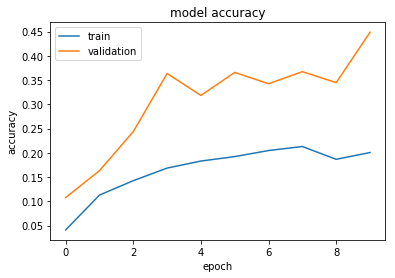

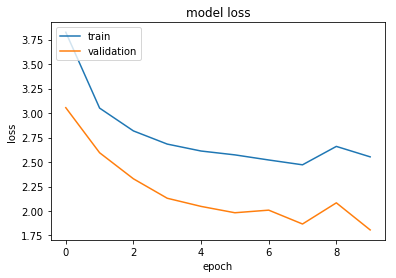

In [147]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### LeNet-5

We now use full size images with a CNN in Keras from scratch. Adapt Yann LeCun’s LeNet-5 network structure

In [157]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# inspired by https://www.kaggle.com/ftence/keras-cnn-inspired-by-lenet-5?scriptVersionId=382274

# using relu several websites have indicatted its more powerful as oppossed to tanh
# which was originally proposed in the paper
model = Sequential()
# would of liked to use a higher # of conv filters instead of 12 in order to try to get better results
# but due to lack of computation power I have left it at 12
model.add(Convolution2D(12, 5, 5, activation = 'relu', input_shape=(128,128,3), init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# again, wouldve liked a higher # than 25
model.add(Convolution2D(25, 5, 5, activation = 'relu', init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# fully connected layers
model.add(Dense(180, activation = 'relu', init='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu', init='he_normal'))
model.add(Dropout(0.5))
# num of classes is 68
model.add(Dense(68, activation = 'softmax', init='he_normal')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])



STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history_lenet = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)


/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (5, 5), activation="relu", input_shape=(128, 128,..., kernel_initializer="he_normal")`
  after removing the cwd from sys.path.
/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu", kernel_initializer="he_normal")`
  import sys
/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(180, activation="relu", kernel_initializer="he_normal")`
  # Remove the CWD from sys.path while we load stuff.
/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_init

Epoch 1/10
340/340 [==============================] - 349s 1s/step - loss: 4.0528 - acc: 0.0381 - val_loss: 3.5846 - val_acc: 0.1071
Epoch 2/10
340/340 [==============================] - 551s 2s/step - loss: 3.5994 - acc: 0.0890 - val_loss: 3.1317 - val_acc: 0.1370
Epoch 3/10
340/340 [==============================] - 590s 2s/step - loss: 3.2087 - acc: 0.1359 - val_loss: 2.6385 - val_acc: 0.2575
Epoch 4/10
340/340 [==============================] - 581s 2s/step - loss: 2.8011 - acc: 0.2005 - val_loss: 2.1905 - val_acc: 0.3268
Epoch 5/10
340/340 [==============================] - 620s 2s/step - loss: 2.4458 - acc: 0.2575 - val_loss: 1.8126 - val_acc: 0.4699
Epoch 6/10
340/340 [==============================] - 673s 2s/step - loss: 2.1249 - acc: 0.3260 - val_loss: 1.3704 - val_acc: 0.6130
Epoch 7/10
  1/340 [..............................] - ETA: 3:25 - loss: 1.8651 - acc: 0.4062

/Users/FLSingerman/anaconda2/envs/python3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.855371). Check your callbacks.
  % delta_t_median)


340/340 [==============================] - 565s 2s/step - loss: 1.9086 - acc: 0.3694 - val_loss: 1.2845 - val_acc: 0.5655
Epoch 8/10
340/340 [==============================] - 476s 1s/step - loss: 1.7234 - acc: 0.4173 - val_loss: 1.0918 - val_acc: 0.6792
Epoch 9/10
340/340 [==============================] - 643s 2s/step - loss: 1.5803 - acc: 0.4562 - val_loss: 0.9729 - val_acc: 0.6965
Epoch 10/10
340/340 [==============================] - 451s 1s/step - loss: 1.4326 - acc: 0.4926 - val_loss: 1.1519 - val_acc: 0.5474


In [158]:
model.evaluate_generator(generator=validation_generator)

[1.1437916952020981, 0.5463235294117647]

In [159]:
validation_generator.reset()
pred_lenet =model.predict_generator(validation_generator,verbose=1)

predicted_class_indices=np.argmax(pred_lenet,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames =validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

43/43 [==============================] - 38s 874ms/step


,Filename,Predictions
0,000000.bmp,paper001
1,000001.bmp,barleyrice006
2,000002.bmp,canvas020
3,000003.bmp,sandpaper007
4,000004.bmp,canvas024
5,000005.bmp,barleyrice007
6,000006.bmp,carpet012
7,000007.bmp,canvas024
8,000008.bmp,carpet010
9,000009.bmp,sandpaper003


Plot again a loss curve showing both training and testing results.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


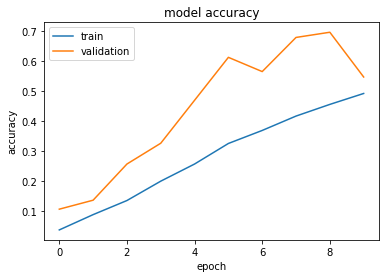

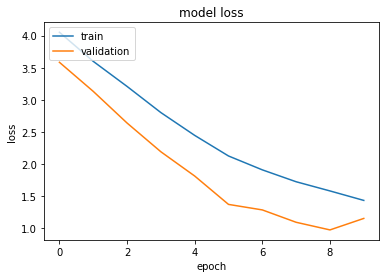

In [160]:
%matplotlib inline

print(history_lenet.history.keys())
#  "Accuracy"
plt.plot(history_lenet.history['acc'])
plt.plot(history_lenet.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_lenet.history['loss'])
plt.plot(history_lenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Visualize diferent input or layers by projecting them into 2D with sklearn. manifold.TSNE. 
I began by using PCA on the dataset to lower the dimensionality. Unfortunally running time took too long to get results. I believe we wouldve seen a color coded plot grouped up. Showing the 68 classes clustered up showing the similarity and differences between the classes. We probabily wouldve seen much overlap between the similar textures (canvas001, canvas002 etc) and major differences between very different textures (rubber001, sandpaper004)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# inspired from https://www.datacamp.com/community/tutorials/introduction-t-sne

pca = PCA(n_components=2)
pca_result = pca.fit_transform(validation_generator_small['col_x'])
pca_result

principalDf = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])


finalDf = pd.concat([principalDf, validation_generator_small[['col_y']]], axis = 1)


In [ ]:
# chose a higher perplexity since the dataset is rather large. Chose a lower number of iterations due to 
# runtime contraints
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# i chose the smallest data set I have which is the validation set with smaller resolution
tsne_results = tsne.fit_transform(finalDf)


In [ ]:
figure(figsize=(10, 5))
scatter(tsne_results[:, 0], tsne_results[:, 1], c=classes)


### VGG-16 (no longer on assignment)

We adapt the the VGG-16 network for the task. Adding fully-connected layer(s) and a softmax classifier at the output and remove some layers. The model was taking a long time to run so I stopped it after 4 epochs but I believe the algorithm is correct.

In [22]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model


vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

output = vgg16_base.output

#input = Input(shape=(128,128,3),name = 'image_input')

#output_vgg16_conv = vgg16_base(input)

output = Flatten(name='flatten')(output)
output = Dense(4096, activation='relu')(output)
output = Dense(4096, activation='relu')(output)
output = Dense(68, activation='softmax')(output)

model = Model(vgg16_base.input, output)

for layer in vgg16_base.layers:
   layer.trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history_vgg16 = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)



Epoch 1/10
340/340 [==============================] - 1758s 5s/step - loss: 15.8512 - acc: 0.0142 - val_loss: 15.8902 - val_acc: 0.0141
Epoch 2/10
340/340 [==============================] - 1744s 5s/step - loss: 15.8811 - acc: 0.0147 - val_loss: 15.8875 - val_acc: 0.0143
Epoch 3/10
340/340 [==============================] - 1706s 5s/step - loss: 15.8811 - acc: 0.0147 - val_loss: 15.8632 - val_acc: 0.0158
Epoch 4/10
208/340 [=================>............] - ETA: 10:09 - loss: 15.8832 - acc: 0.0146

KeyboardInterrupt: 

In [23]:
model.evaluate_generator(generator=validation_generator)

[15.881064471076517, 0.014705882352941176]

Since I halted the execution above history_vgg16 has no data so it will not produce a plot. However, I expect it to be somewhat simular to the ones above.

In [24]:
%matplotlib inline

print(history_vgg16.history.keys())
#  "Accuracy"
plt.plot(history_vgg16.history['acc'])
plt.plot(history_vgg16.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'history_vgg16' is not defined